# Identifying Ethnicity in OpenSAFELY-TPP
This short report describes how ethnicity can be identified in the OpenSAFELY-TPP database, and the strengths and weaknesses of the methods. This is a living document that will be updated to reflect changes to the OpenSAFELY-TPP database and the patient records within.

## OpenSAFELY
OpenSAFELY is an analytics platform for conducting analyses on Electronic Health Records inside the secure environment where the records are held. This has multiple benefits: 

* We don't transport large volumes of potentially disclosive pseudonymised patient data outside of the secure environments for analysis
* Analyses can run in near real-time as records are ready for analysis as soon as they appear in the secure environment
* All infrastructure and analysis code is stored in GitHub repositories, which are open for security review, scientific review, and re-use

A key feature of OpenSAFELY is the use of study definitions, which are formal specifications of the datasets to be generated from the OpenSAFELY database. This takes care of much of the complex EHR data wrangling required to create a dataset in an analysis-ready format. It also creates a library of standardised and validated variable definitions that can be deployed consistently across multiple projects. 

The purpose of this report is to describe all such variables that relate to BMI, their relative strengths and weaknesses, in what scenarios they are best deployed. It will also describe potential future definitions that have not yet been implemented.

## Available Records
OpenSAFELY-TPP runs inside TPP’s data centre which contains the primary care records for all patients registered at practices using TPP’s SystmOne Clinical Information System. This data centre also imports external datasets from other sources, including A&E attendances and hospital admissions from NHS Digital’s Secondary Use Service, and death registrations from the ONS. More information on available data sources can be found within the OpenSAFELY documentation. 

In [1]:
import os
import pandas as pd

from IPython.display import display, Markdown, Image

pd.set_option('display.max_rows', 500)
pd.options.mode.chained_assignment = None 

In [2]:
### CONFIGURE ###
definitions = ['ethnicity_5', 'ethnicity_new_5', 'ethnicity_primis_5']
covariates = ['_age_band','_sex','_region','_imd','_dementia','_diabetes','_hypertension','_learning_disability']

## Results

### Count of Patients

In [3]:
df_patient_counts = pd.read_csv('../output/tables/patient_counts_filled.csv').set_index(['group','subgroup'])
display(df_patient_counts)

ethnicity_5 ethnicity_new_5  \
group               subgroup                                                 
all                 with records              750.0 (75.0)      750 (75.0)   
age_band            0-19                      100.0 (80.0)       95 (76.0)   
                    20-29                      90.0 (75.0)       90 (75.0)   
                    30-39                     110.0 (75.9)      105 (72.4)   
                    40-49                      80.0 (72.7)       85 (77.3)   
                    50-59                     105.0 (75.0)      110 (78.6)   
                    60-69                      90.0 (78.3)       90 (78.3)   
                    70-79                     100.0 (74.1)      100 (74.1)   
                    80+                        75.0 (71.4)       75 (71.4)   
sex                 F                         375.0 (75.0)      380 (76.0)   
                    M                         375.0 (75.0)      370 (74.0)   
region              East Midlands              50.0 (76.9)       55 (84.6)   
                    East of England            45.0 (64.3)       50 (71.4)   
                    London                     95.0 (73.1)       95 (73.1)   
                    North East                 45.0 (75.0)       45 (75.0)   
                    North West                 55.0 (78.6)       55 (78.6)   
                    South East                100.0 (74.1)      100 (74.1)   
                    West Midlands              55.0 (78.6)       55 (78.6)   
                    Yorkshire and the Humber   40.0 (72.7)       40 (72.7)   
imd                 1 Most deprived           120.0 (68.6)      130 (74.3)   
                    2                         150.0 (73.2)      155 (75.6)   
                    3                         165.0 (76.7)      160 (74.4)   
                    4                         145.0 (74.4)      150 (76.9)   
                    5 Least deprived          170.0 (79.1)      150 (69.8)   
dementia            False                     745.0 (75.3)      745 (75.3)   
                    True                             - (-)        5 (50.0)   
diabetes            False                     745.0 (75.3)      740 (74.7)   
                    True                        5.0 (50.0)      10 (100.0)   
hypertension        False                     740.0 (74.7)      740 (74.7)   
                    True                      10.0 (100.0)      10 (100.0)   
learning_disability False                     740.0 (74.7)      740 (74.7)   
                    True                      10.0 (100.0)      10 (100.0)   

                                             ethnicity_primis_5    all_filled  \
group               subgroup                                                    
all                 with records                     705 (70.5)  420.0 (42.0)   
age_band            0-19                              85 (68.0)   50.0 (40.0)   
                    20-29                             90 (75.0)   55.0 (45.8)   
                    30-39                            105 (72.4)   60.0 (41.4)   
                    40-49                             75 (68.2)   45.0 (40.9)   
                    50-59                             95 (67.9)   65.0 (46.4)   
                    60-69                             80 (69.6)   50.0 (43.5)   
                    70-79                             95 (70.4)   55.0 (40.7)   
                    80+                               80 (76.2)   40.0 (38.1)   
sex                 F                                345 (69.0)  210.0 (42.0)   
                    M                                360 (72.0)  210.0 (42.0)   
region              East Midlands                     50 (76.9)   35.0 (53.8)   
                    East of England                   45 (64.3)   20.0 (28.6)   
                    London                            85 (65.4)   50.0 (38.5)   
                    North East                        35 (58.3)   20.0 (33.3)   
                 

### Count of Missings

In [4]:
df_patient_counts_missing = pd.read_csv('../output/tables/patient_counts_missing.csv').set_index(['group','subgroup'])
display(df_patient_counts_missing)

ethnicity_5 ethnicity_new_5  \
group               subgroup                                                 
all                 missing records           250.0 (25.0)    250.0 (25.0)   
age_band            0-19                       30.0 (24.0)     30.0 (24.0)   
                    20-29                      30.0 (25.0)     35.0 (29.2)   
                    30-39                      35.0 (24.1)     40.0 (27.6)   
                    40-49                      30.0 (27.3)     25.0 (22.7)   
                    50-59                      35.0 (25.0)     25.0 (17.9)   
                    60-69                      25.0 (21.7)     25.0 (21.7)   
                    70-79                      40.0 (29.6)     35.0 (25.9)   
                    80+                        30.0 (28.6)     30.0 (28.6)   
sex                 F                         130.0 (26.0)    120.0 (24.0)   
                    M                         120.0 (24.0)    130.0 (26.0)   
region              East Midlands              15.0 (23.1)     10.0 (15.4)   
                    East of England            25.0 (35.7)     20.0 (28.6)   
                    London                     35.0 (26.9)     35.0 (26.9)   
                    North East                 15.0 (25.0)     15.0 (25.0)   
                    North West                 15.0 (21.4)     10.0 (14.3)   
                    South East                 35.0 (25.9)     35.0 (25.9)   
                    West Midlands              15.0 (21.4)     15.0 (21.4)   
                    Yorkshire and the Humber   10.0 (18.2)     10.0 (18.2)   
imd                 1 Most deprived            55.0 (31.4)     45.0 (25.7)   
                    2                          55.0 (26.8)     50.0 (24.4)   
                    3                          50.0 (23.3)     55.0 (25.6)   
                    4                          50.0 (25.6)     40.0 (20.5)   
                    5 Least deprived           40.0 (18.6)     60.0 (27.9)   
dementia            False                     245.0 (24.7)    245.0 (24.7)   
                    True                             - (-)           - (-)   
diabetes            False                     245.0 (24.7)    250.0 (25.3)   
                    True                             - (-)           - (-)   
hypertension        False                     250.0 (25.3)    250.0 (25.3)   
                    True                             - (-)           - (-)   
learning_disability False                     250.0 (25.3)    250.0 (25.3)   
                    True                             - (-)           - (-)   

                                             ethnicity_primis_5 all_missing  \
group               subgroup                                                  
all                 missing records                295.0 (29.5)  25.0 (2.5)   
age_band            0-19                            40.0 (32.0)       - (-)   
                    20-29                           35.0 (29.2)   5.0 (4.2)   
                    30-39                           40.0 (27.6)       - (-)   
                    40-49                           35.0 (31.8)       - (-)   
                    50-59                           45.0 (32.1)       - (-)   
                    60-69                           35.0 (30.4)       - (-)   
                    70-79                           40.0 (29.6)   5.0 (3.7)   
                    80+                             25.0 (23.8)       - (-)   
sex                 F                              155.0 (31.0)  15.0 (3.0)   
                    M                              140.0 (28.0)  10.0 (2.0)   
region              East Midlands                   15.0 (23.1)       - (-)   
                    East of England                 25.0 (35.7)       - (-)   
                    London                          40.0 (30.8)       - (-)   
                    North East                      25.0 (41.7)       - (-)   
                    North West                     

### Count by Category

In [5]:
df_patient_cat_counts = pd.read_csv('../output/tables/patient_counts_by_categories_filled.csv').set_index(['group','subgroup'])
display(df_patient_cat_counts)

ethnicity_5_Asian  \
group               subgroup                                     
all                 with records                  155.0 (15.5)   
age_band            0-19                           20.0 (16.0)   
                    20-29                          15.0 (12.5)   
                    30-39                          25.0 (17.2)   
                    40-49                          20.0 (18.2)   
                    50-59                          25.0 (17.9)   
                    60-69                          20.0 (17.4)   
                    70-79                          20.0 (14.8)   
                    80+                             10.0 (9.5)   
sex                 F                              80.0 (16.0)   
                    M                              70.0 (14.0)   
region              East Midlands                  10.0 (15.4)   
                    East of England                10.0 (14.3)   
                    London                         15.0 (11.5)   
                    North East                       5.0 (8.3)   
                    North West                     15.0 (21.4)   
                    South East                     20.0 (14.8)   
                    West Midlands                  10.0 (14.3)   
                    Yorkshire and the Humber       10.0 (18.2)   
imd                 1 Most deprived                30.0 (17.1)   
                    2                              30.0 (14.6)   
                    3                              30.0 (14.0)   
                    4                              30.0 (15.4)   
                    5 Least deprived               35.0 (16.3)   
dementia            False                         155.0 (15.7)   
                    True                                 - (-)   
diabetes            False                         150.0 (15.2)   
                    True                                 - (-)   
hypertension        False                         150.0 (15.2)   
                    True                                 - (-)   
learning_disability False                         150.0 (15.2)   
                    True                                 - (-)   

                                             ethnicity_5_Black  \
group               subgroup                                     
all                 with records                  140.0 (14.0)   
age_band            0-19                           15.0 (12.0)   
                    20-29                          20.0 (16.7)   
                    30-39                          20.0 (13.8)   
                    40-49                          15.0 (13.6)   
                    50-59                          20.0 (14.3)   
                    60-69                          15.0 (13.0)   
                    70-79                          15.0 (11.1)   
                    80+                            15.0 (14.3)   
sex                 F                              65.0 (13.0)   
                    M                              70.0 (14.0)   
region              East Midlands                  10.0 (15.4)   
                    East of England                  5.0 (7.1)   
                    London                         15.0 (11.5)   
                    North East                     10.0 (16.7)   
                    North West                       5.0 (7.1)   
                    South East                     20.0 (14.8)   
                    West Midlands                  20.0 (28.6)   
                    Yorkshire and the Humber       10.0 (18.2)   
imd                 1 Most deprived                30.0 (17.1)   
                    2                              25.0 (12.2)   
                    3                              30.0 (14.0)   
                    4                              20.0 (10.3)   
                    5 Least deprived               30.0 (14.0)   
dementia            False                         140.0 (14.1)   
                  

### Overlapping Definitions
Idea: Use an upset plot

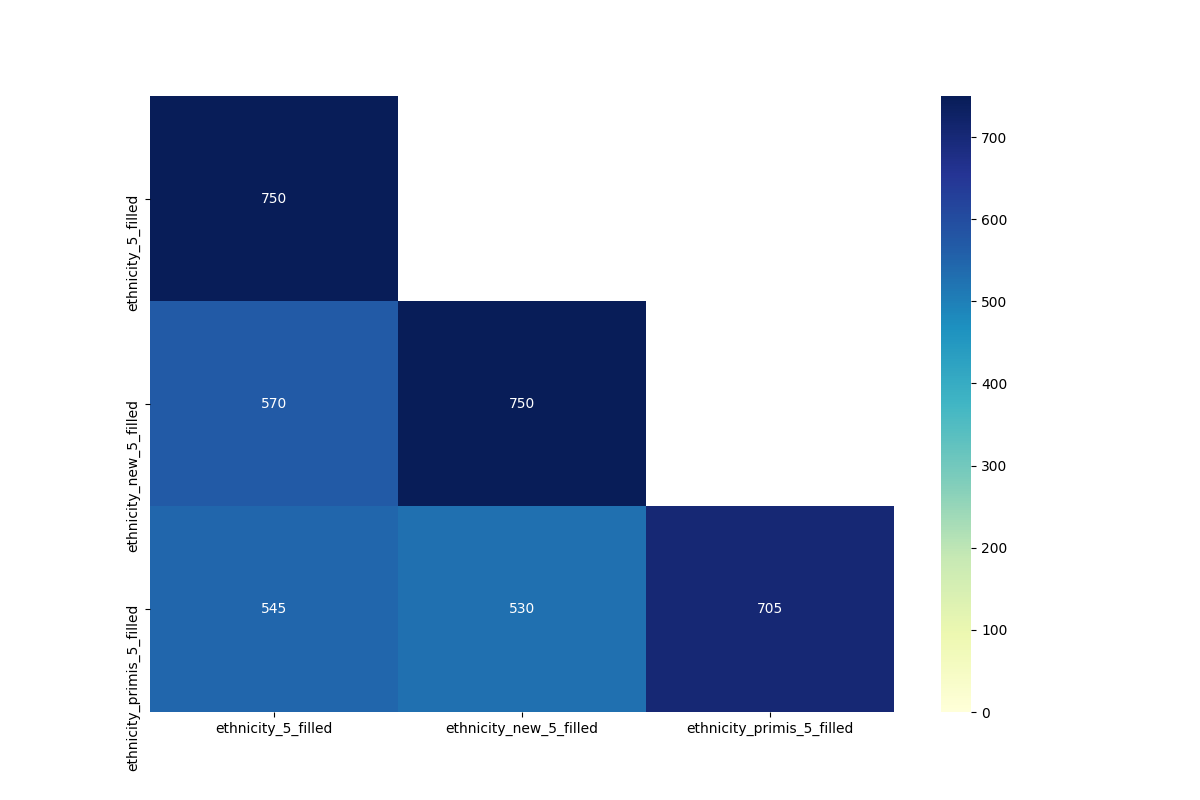

In [6]:
display(Image("../output/figures/heatmap.png"))

### Latest vs. Most Common

In [7]:
for definition in definitions:
    df_simple = pd.read_csv(f'../output/tables/latest_common_simple_{definition}.csv').set_index(definition)
    df_expanded = pd.read_csv(f'../output/tables/latest_common_expanded_{definition}.csv').set_index(definition)
    display(df_simple)
    display(df_expanded)

,matching (n=250.0),not_matching (n=1020.0)
ethnicity_5,,
Asian,40.0,245.0
Black,40.0,225.0
Mixed,30.0,225.0
Other,25.0,205.0
White,115.0,120.0


,asian_count (n=170.0),black_count (n=165.0),mixed_count (n=165.0),other_count (n=170.0),white_count (n=600.0)
ethnicity_5,,,,,
Asian,40.0,40.0,35.0,40.0,130.0
Black,35.0,40.0,40.0,40.0,110.0
Mixed,35.0,30.0,30.0,35.0,125.0
Other,30.0,25.0,30.0,25.0,120.0
White,30.0,30.0,30.0,30.0,115.0


,matching (n=260.0),not_matching (n=1015.0)
ethnicity_new_5,,
Asian,25.0,205.0
Black,35.0,225.0
Mixed,30.0,215.0
Other,30.0,215.0
White,140.0,155.0


,asian_count (n=165.0),black_count (n=175.0),mixed_count (n=170.0),other_count (n=165.0),white_count (n=600.0)
ethnicity_new_5,,,,,
Asian,25.0,30.0,30.0,30.0,115.0
Black,35.0,35.0,35.0,35.0,120.0
Mixed,35.0,35.0,30.0,30.0,115.0
Other,35.0,35.0,35.0,30.0,110.0
White,35.0,40.0,40.0,40.0,140.0


,matching (n=290.0),not_matching (n=880.0)
ethnicity_primis_5,,
Asian,15.0,120.0
Black,20.0,140.0
Mixed,60.0,335.0
Other,15.0,100.0
White,180.0,185.0


,asian_count (n=155.0),black_count (n=150.0),mixed_count (n=145.0),other_count (n=160.0),white_count (n=560.0)
ethnicity_primis_5,,,,,
Asian,15.0,15.0,15.0,20.0,70.0
Black,25.0,20.0,15.0,25.0,75.0
Mixed,60.0,55.0,60.0,50.0,170.0
Other,10.0,15.0,10.0,15.0,65.0
White,45.0,45.0,45.0,50.0,180.0


### State Change

In [8]:
for definition in definitions:
    df_state_change = pd.read_csv(f'../output/tables/state_change_{definition}.csv').set_index(definition)
    display(df_state_change)

,asian_count,black_count,mixed_count,other_count,white_count
ethnicity_5,,,,,
Asian (n = 155),-,15.0,5.0,20.0,120.0
Black (n = 140),15.0,-,15.0,15.0,100.0
Mixed (n = 165),15.0,15.0,-,15.0,130.0
Other (n = 150),15.0,10.0,20.0,-,120.0
White (n = 145),15.0,10.0,15.0,15.0,-


,asian_count,black_count,mixed_count,other_count,white_count
ethnicity_new_5,,,,,
Asian (n = 145),-,20.0,15.0,15.0,115.0
Black (n = 155),15.0,-,20.0,15.0,110.0
Mixed (n = 135),15.0,15.0,-,5.0,105.0
Other (n = 140),15.0,10.0,10.0,-,100.0
White (n = 175),10.0,15.0,15.0,15.0,-


,asian_count,black_count,mixed_count,other_count,white_count
ethnicity_primis_5,,,,,
Asian (n = 85),-,5.0,10.0,10.0,65.0
Black (n = 95),10.0,-,5.0,15.0,75.0
Mixed (n = 220),25.0,20.0,-,10.0,170.0
Other (n = 85),5.0,10.0,10.0,-,70.0
White (n = 215),20.0,20.0,15.0,25.0,-
